In [16]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.interpolate import lagrange

# Laboratorio 05: Diferenciación

---
### Profesor: Juan Marcos Marín
### Nombre: Laura Camila Rios Quintero
*Métodos computacionales 2024-II*

---

#1.
En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de $L$, la primera ley de kirshhoff nos da la siguiente relación

\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

``t = 1.00, 1.01, 1.02, 1.03, 1.04``

``i = 3.10, 3.12, 3.14, 3.18, 3.24``


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L= 0.98$ H, la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee el metodo de diferencias finitas y de tres puntos para calcular la derivada numérica.
- Ahora, encuentre un polinomio de interpolación usando alguno de los métodos vistos y calcule la derivada 'exacta'. Compare sus resultados.

In [6]:
# Datos
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])

i = np.array([3.10, 3.12, 3.14, 3.18, 3.24] )

datos = pd.DataFrame({'t(s)': t, 'i(A)': i})
print(datos)

   t(s)  i(A)
0  1.00  3.10
1  1.01  3.12
2  1.02  3.14
3  1.03  3.18
4  1.04  3.24


In [8]:
# Calculo de la derivada con el metodo de derivada de tres puntos


def derivada_tres_puntos(i_valores, h):
    n = len(i_valores)
    derivada = np.zeros(n)

    for i in range(n):
        if i == 0:
            # Diferencias finitas adelantadas
            derivada[i] = (-3 * i_valores[i] + 4 * i_valores[i+1] - i_valores[i+2]) / (2 * h)
        elif i == n - 1:
            # Diferencias finitas atrasadas
            derivada[i] = (3 * i_valores[i] - 4 * i_valores[i-1] + i_valores[i-2]) / (2 * h)
        else:
            # Diferencias finitas centradas
            derivada[i] = (i_valores[i+1] - i_valores[i-1]) / (2 * h)

    return derivada

In [15]:
L = 0.98
R = 0.142

datos['di/dt'] = derivada_tres_puntos(i,0.01)   # agregar columna a la dataframe con las derivadas

datos['Voltaje'] = L * datos['di/dt'] + R * datos['i(A)']    # Agregar voltaje

print(datos)

   t(s)  i(A)  di/dt  Voltaje
0  1.00  3.10    2.0  2.40020
1  1.01  3.12    2.0  2.40304
2  1.02  3.14    3.0  3.38588
3  1.03  3.18    5.0  5.35156
4  1.04  3.24    7.0  7.32008


In [22]:
# interpolar los datos

poly_lagrenge = lagrange(t,i)     # polinomio de lagrange para los datos
derivada_interp = np.gradient(poly_lagrenge,t)

datos['di/dt interpolado'] = np.gradient(poly_lagrenge,t)
datos['Voltaje interpolado'] = L * datos['di/dt interpolado'] + R * datos['i(A)']

print(datos)

   t(s)  i(A)  di/dt  Voltaje  di/dt interpolado  Voltaje interpolado
0  1.00  3.10    2.0  2.40020       4.250000e+07         4.165000e+07
1  1.01  3.12    2.0  2.40304      -2.209292e+07        -2.165106e+07
2  1.02  3.14    3.0  3.38588       8.526583e+05         8.356056e+05
3  1.03  3.18    5.0  5.35156       2.166666e+07         2.123333e+07
4  1.04  3.24    7.0  7.32008      -4.505782e+07        -4.415667e+07


# 2.

Usando la siguiente tabla, determinar la velocidad instantanea para cada uno de los tiempo y distancias mostrados.

* ¿Cuál será la velocidad para $t=12$?

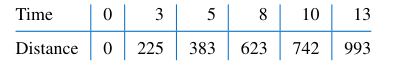



In [25]:
# datos

tiempo = np.array([0,3,5,8,10,13])
distancia = np.array([0,225,383,623,742,993])


# velocidad intantanea

dx_dt = np.gradient(distancia,tiempo)

In [30]:
poly_lagrenge = lagrange(tiempo,distancia)


print(poly_lagrenge)
derivada = np.polyder(poly_lagrenge)   # derivada del polinomio de lagrange (velocidad)
print(derivada)

         5         4         3         2
0.01746 x - 0.508 x + 4.962 x - 18.75 x + 98.9 x
         4         3         2
0.08732 x - 2.032 x + 14.88 x - 37.5 x + 98.9


In [31]:
# velocidad para t= 12

derivada(12)

91.73697802196048

# 3.

Para un cohete, se recabaron los datos siguientes de la distancia
recorrida $y$ versus el tiempo $t$:

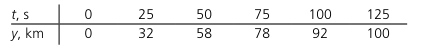

Use diferenciación numérica para estimar la velocidad y aceleración
del cohete en cada momento.

In [32]:
t = np.array([0,25,50,75,100,125])
y = np.array([0,32,58,78,92,100])

In [33]:
# velocidad

def derivada_tres_puntos(y_valores, h):
    n = len(y_valores)
    derivada = np.zeros(n)

    for i in range(n):
        if i == 0:
            # Diferencias finitas adelantadas
            derivada[i] = (-3 * y_valores[i] + 4 * y_valores[i+1] - y_valores[i+2]) / (2 * h)
        elif i == n - 1:
            # Diferencias finitas atrasadas
            derivada[i] = (3 * y_valores[i] - 4 * y_valores[i-1] + y_valores[i-2]) / (2 * h)
        else:
            # Diferencias finitas centradas
            derivada[i] = (y_valores[i+1] - y_valores[i-1]) / (2 * h)

    return derivada

#4.
El potencial eléctrico de un anillo de radio $R$, en su parte superior $z$ viene dado por:


\begin{equation}
V = \frac{kq_{tot}}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para $z>0$ y $R=0.1$ mm. Reescale el problema en unidades de $kq_{tot}$ empleando:

**a.** La librearia sympy.

**b.** Calcular el campo en el punto  $z = 0.1$ mm empleando el metodo np.grad

**c.** Calcular el campo para diferentes valores de $z$ con $z>0$,  empleando np.grad Construya un gráfico de $E$ vs $z$.

---
Recuerde que la componente $z$ del campo electrico esta dado por:

\begin{equation}
E_z = - \frac{\partial V}{\partial z}
\end{equation}

In [35]:

radio = 0.1  # Radio

# a) Derivada simbólica con SymPy
z = sp.Symbol('z', real=True, positive=True) # variable z
voltaje = 1 / sp.sqrt(z**2 + radio**2)  # ecuacion de V

campo_electrico_sym = -sp.diff(voltaje, z)  # Campo eléctrico (derivada del potencial)
campo_electrico_ = sp.simplify(campo_electrico_sym)

print(f'campo eléctrico:{(campo_electrico_)}')


campo eléctrico:z/(z**2 + 0.01)**(3/2)


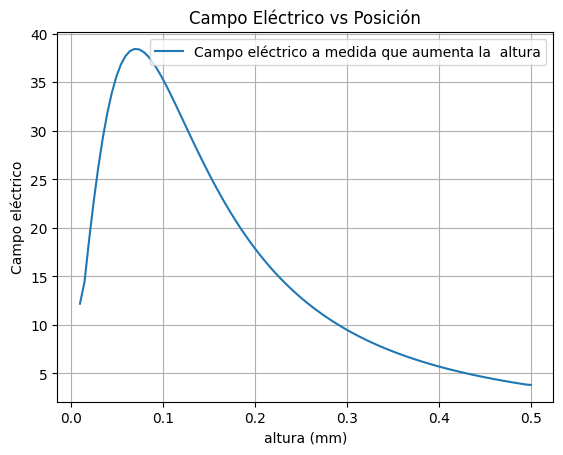

In [37]:
# c) Gráfica de campo eléctrico vs altura

altura_valores = np.linspace(0.01, 0.5, 100)
voltaje_valores = 1 / np.sqrt(altura_valores**2 + radio**2)

campo_valores = -np.gradient(voltaje_valores, altura_valores)

plt.plot(altura_valores, campo_valores, label=r'Campo eléctrico a medida que aumenta la  altura')
plt.xlabel(r'altura (mm)')
plt.ylabel(r'Campo eléctrico')
plt.title('Campo Eléctrico vs Posición')
plt.legend()
plt.grid()
plt.show()
